### Оценка доходности вложений

Основная идея этой программы это обработка внесенных значений выручки, ЧП и капитала для вывода ключевых параметров. 

Моя программа должна состоять из основной части, которая непосредственно обрабатывает данные, выводит ключевые мультипликаторы, выводит рисунки и т.п.

Дополнительно можно сделать чтение с csv файла, и если будет возможность, то напишу другую программу, которая генерит эти csv файлы. 

**мне нужен еще код, который будет генерировать словарь (dictionary), либо из csv файла, либо как-то еще. **

In [28]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

class ReasonableGrowth:
    required_growth = 7    
    
    def __init__(self, 
                 data: dict, 
                 row_names = ['Net Income', 'Revenue','Total Assets', 'Equity', 'Total Liabilites'], 
                 col_names = ['Annual Data']):
        
        self.__data = data
        self.__row_names = row_names        
        self.__col_names = col_names        
        
        self.process_data()        
        self.__df = self.__convert_to_dataframe()
        
    def __convert_to_dataframe(self):
        return pd.DataFrame(self.__data, index = self.__row_names)
    
    def process_data(self):
        self.__calc_roe()  
        self.__calc_liabilities()
        print("Processing is done")
    def __calc_roe(self):
        self.__row_names.append("ROE") # return on equity        
        roe = {}
        keys = []        
        for year in self.__data:
            keys.append(year)
            
        for i in range(len(keys)):
            if i == 0:
                roe[keys[i]] = -1
                continue
            year = keys[i]
            roe[year] = round(self.__data[year][0]/self.__data[year-1][3]*100)
        
        for year in self.__data: #add roe to data dictionary
            self.__data[year].append(roe[year])
            
    def __calc_liabilities(self):
        self.__row_names.append('Indebtness')
        for year in self.__data:
            liability = 100*self.__data[year][4]/self.__data[year][2]
            self.__data[year].append(round(liability))

    def plot_everything(self):
        pass
    def plot_roe(self):
        years = self.__df.columns.values
        y_value = self.__df.loc['ROE'].values
        title = 'ROE'
        ylabel = 'years'
        xlabel = 'percent'
        plt.bar(years, y_value, color='b')
        plt.title(title)
        plt.xlabel(ylabel)
        plt.ylabel(xlabel)
    def plot_income(self):
        years = self.__df.columns.values
        y_value = self.__df.loc['Net Income'].values
        title = 'Net Income'
        ylabel = 'years'
        xlabel = 'USD (in thousands)'
        plt.bar(years, y_value, color='b')
        plt.title(title)
        plt.xlabel(ylabel)
        plt.ylabel(xlabel)
    def plot_revenue(self):
        years = self.__df.columns.values
        y_value = self.__df.loc['Revenue'].values
        title = 'Revenue'
        ylabel = 'years'
        xlabel = 'USD (in thousands)'
        plt.bar(years, y_value, color='b')
        plt.title(title)
        plt.xlabel(ylabel)
        plt.ylabel(xlabel)
        
    def plot_capital(self):
        y_value1 = df.loc['Equity'].values
        y_value2 = df.loc['Total Liabilites'].values
#         fig = plt.subplots(figsize =(10, 7))
        p1 = plt.bar(years, y_value1)
        p2 = plt.bar(years, y_value2, bottom = y_value1)
        plt.legend((p1[0],p2[0]), ('Equity','Liabilites'))
    
    @property
    def dict_data(self):
        return self.__dict_data
    
    # class method
    @classmethod
    def instantiate_from_csv(cls, filename):
        with open(filename, 'r') as f:
            reader = csv.DictReader(f)
            items = list(reader)
    
    
    def __repr__(self):
        df = self.__convert_to_dataframe()
        return repr(df)
    
        #instantiate
#         for item in items:
#             ReasonableGrowth(
#                 name  = item.get('name'),
#                 price = float(item.get('price')),
#                 quantity = int(item.get('quantity'))
#             )

In [29]:
class GrowthCompany(ReasonableGrowth):
    growth_rate = 0
    def __init__(self, dict_data):
        super().__init__(dict_data)
    def extrapolate_growth(self, years=5):
        pass

In [30]:
row_names = ['Net Income', 'Revenue', 
            'Total Assets', 'Equity', 
            'Total Liabilites']
col_names = ['Annual Data']
for year in range(2014,2021,1):
    col_names.append(year)

In [31]:
intel = {}
roe = {}

intel[2014] = [11704,55870,91900,55865,36035]
intel[2015] = [11420,55355,101459,61085,40374]
intel[2016] = [10316,59387,113327,66226,47101]
intel[2017] = [9601,62761,123249,69019,54230]
intel[2018] = [21053,70848,127963,74563,53400]
intel[2019] = [21048,71965,136534,77514,59020]
intel[2020] = [20899,77867,153091,81038,72053]
year = 2014
roe[year] = -1
year = 2015
roe[year] = intel[year][0]/intel[year-1][3]
year = 2016
roe[year] = intel[year][0]/intel[year-1][3]
year = 2017
roe[year] = intel[year][0]/intel[year-1][3]
year = 2018
roe[year] = intel[year][0]/intel[year-1][3]
year = 2019
roe[year] = intel[year][0]/intel[year-1][3]
year = 2020
roe[year] = intel[year][0]/intel[year-1][3]

In [32]:
data = dict(intel)
grow_intel = ReasonableGrowth(data)


Processing is done


In [33]:
grow_intel

                   2014    2015    2016    2017    2018    2019    2020
Net Income        11704   11420   10316    9601   21053   21048   20899
Revenue           55870   55355   59387   62761   70848   71965   77867
Total Assets      91900  101459  113327  123249  127963  136534  153091
Equity            55865   61085   66226   69019   74563   77514   81038
Total Liabilites  36035   40374   47101   54230   53400   59020   72053
ROE                  -1      20      17      14      31      28      27
Indebtness           39      40      42      44      42      43      47

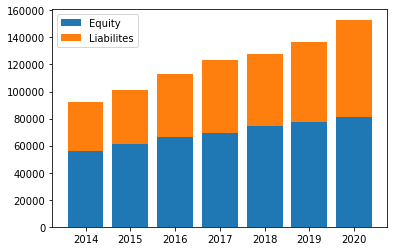

In [34]:
grow_intel.plot_capital()

In [7]:
roe

{2014: -1,
 2015: 0.20442137295265372,
 2016: 0.16887943030203814,
 2017: 0.14497327333675597,
 2018: 0.3050319477245396,
 2019: 0.28228477931413704,
 2020: 0.26961581133730683}

### Тестирование элементов программы

In [5]:
# это сделано для удобства
stock = intel

In [6]:
# мне нужно хранить roe в процентах, поэтому умножай на 100 и округляй
roe = {}

keys = []
for year in stock:
    keys.append(year)
    
for i in range(len(keys)):
    if i == 0:
        roe[keys[i]] = -1
        continue
    year = keys[i]
    roe[year] = round(stock[year][0]/stock[year-1][3]*100)

row_names.append("ROE") # return on equity

In [7]:
roe

{2014: -1, 2015: 20, 2016: 17, 2017: 14, 2018: 31, 2019: 28, 2020: 27}

In [8]:
for year in stock:
    stock[year].append(roe[year])

In [9]:
stock

{2014: [11704, 55870, 91900, 55865, 36035, -1],
 2015: [11420, 55355, 101459, 61085, 40374, 20],
 2016: [10316, 59387, 113327, 66226, 47101, 17],
 2017: [9601, 62761, 123249, 69019, 54230, 14],
 2018: [21053, 70848, 127963, 74563, 53400, 31],
 2019: [21048, 71965, 136534, 77514, 59020, 28],
 2020: [20899, 77867, 153091, 81038, 72053, 27]}

Total Liabilities / Total Assets --- это закредитованность компании. 
Очень важный параметр

In [10]:
row_names.append('Indebtness')
for year in stock:
    liability = 100*stock[year][4]/stock[year][2]
    stock[year].append(round(liability))

In [11]:
row_names

['Net Income',
 'Revenue',
 'Total Assets',
 'Equity',
 'Total Liabilites',
 'ROE',
 'Indebtness']

In [12]:
df = pd.DataFrame(intel, index = row_names)

In [13]:
df

,2014,2015,2016,2017,2018,2019,2020
Net Income,11704,11420,10316,9601,21053,21048,20899
Revenue,55870,55355,59387,62761,70848,71965,77867
Total Assets,91900,101459,113327,123249,127963,136534,153091
Equity,55865,61085,66226,69019,74563,77514,81038
Total Liabilites,36035,40374,47101,54230,53400,59020,72053
ROE,-1,20,17,14,31,28,27
Indebtness,39,40,42,44,42,43,47


In [15]:
years = df.columns.values
y_value = df.loc['Revenue'].values

Text(0, 0.5, 'USD (in thousands)')

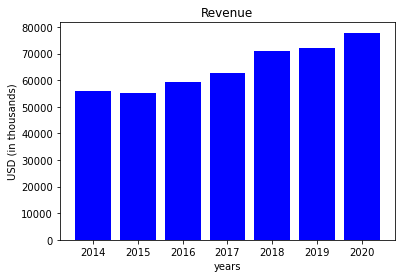

In [16]:
title = 'Revenue'
ylabel = 'years'
xlabel = 'USD (in thousands)'
plt.bar(years, y_value, color='b')
plt.title(title)
plt.xlabel(ylabel)
plt.ylabel(xlabel)

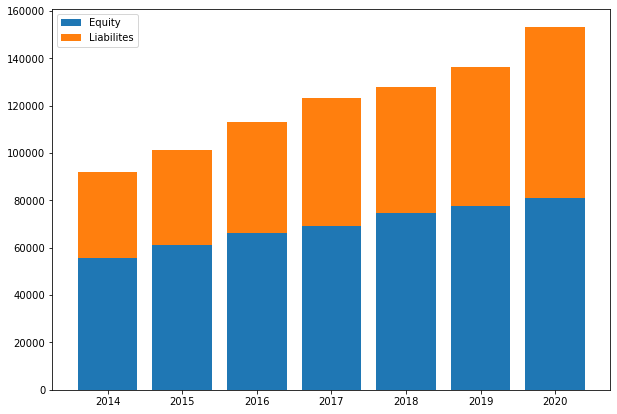

In [19]:
y_value1 = df.loc['Equity'].values
y_value2 = df.loc['Total Liabilites'].values
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(years, y_value1)
p2 = plt.bar(years, y_value2, bottom = y_value1)
plt.legend((p1[0],p2[0]), ('Equity','Liabilites'))